# BIG MART SALES DATA PREDICTION

### CONTENTS

1. Import Relevant Libraries
2. Data Inspection
3. Data Cleaning
4. Exploratory Data Analysis

### PROBLEM STATEMENT

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

### DATA



* Item_Identifier : Unique product ID

* Item_Weight : Weight of product

* Item_Fat_Content : Whether the product is low fat or not

* Item_Visibility : The % of total display area of all products in a store allocated to the particular product

* Item_Type : The category to which the product belongs

* Item_MRP : Maximum Retail Price (list price) of the product

* Outlet_Identifier : Unique store ID

* Outlet_Establishment_Year : The year in which store was established

* Outlet_Size : The size of the store in terms of ground area covered

* Outlet_Location_Type : The type of city in which the store is located

* Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

* Item_Outlet_Sales : Sales of the product in the particular store.


### Step 1: Importing the Relevant libraries 

In [299]:
# Analysis related libraries 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()
%matplotlib inline

In [300]:
# ML relatated libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## Step 2 : Data inspection
#### Reading the dataframe

In [301]:
train = pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [302]:
# Lets take a lock on the data
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [303]:
train.shape, test.shape

((8523, 12), (5681, 11))

##### As said above we have 8523 rows and 12 columns in Train set whereas Test set has 5681 rows and 11 columns.

### Checking if there is missing values

In [304]:
def check_missing_values(df):
    """
    Checks if there is missing values in the dataframe and prints it prints is percentage
    if there is a column with missing values.
    
    INPUTS:
        df: the dataframe we want to check
    RETURN:
        The missing values column name and its percentage
    """
    # Getting columns with missing values in a list
    missing_cols = df.columns[df.isnull().any() == True].tolist()
    # Calculating % of missing values in each column
    col_perscentage = df.isnull().sum()/ df.shape[0]*100
    
    print("-"*50)
    if missing_cols == []:
        print("The DataFrame has No Missing Values!")
    else:
        for i, col in enumerate(missing_cols):
            print('"{}" column has {:.2f}% of missing values.'.format(col, col_perscentage[missing_cols[i]]))
    print("-"*50)
        

In [305]:
check_missing_values(train)
check_missing_values(test)

--------------------------------------------------
"Item_Weight" column has 17.17% of missing values.
"Outlet_Size" column has 28.28% of missing values.
--------------------------------------------------
--------------------------------------------------
"Item_Weight" column has 17.18% of missing values.
"Outlet_Size" column has 28.27% of missing values.
--------------------------------------------------


#### We have same missing values percentage of Item Size and Outlet Size columns in training set as that of in Test set.

In [306]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [307]:
# Training categorical and numerical columns
categorical_columns_train = train.select_dtypes(include=[object])
print("Training categorical Features in Train Set:", len(categorical_columns_train.columns))
numerical_columns_train = train.select_dtypes(include=[np.float64, np.int64])
print("Training numerical Features in Train Set:", len(categorical_columns_train.columns))

# testing categorical and numerical columns
categorical_columns_test = test.select_dtypes(include=[object])
print("\nTesting categorical Features in Test Set:", len(categorical_columns_test.columns))
numerical_columns_test = test.select_dtypes(include=[np.float64, np.int64])
print("Testing numerical Features in Test Set:", len(numerical_columns_test.columns))

Training categorical Features in Train Set: 7
Training numerical Features in Train Set: 7

Testing categorical Features in Test Set: 7
Testing numerical Features in Test Set: 4


It makes sense because the test set has a missing column "Item_Outlet_Sales" which we will predict 

-----------

### Numerical stats

In [308]:
# Numerical description of the data
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [309]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


#### From these tables we observe that:
- The features of our data are perfectly balanced.
- The mean of Item_Visibility column is very low, which means that there are many items are not visible to customers.
- The items sold in all types of markets aren't very heavy as the maximum weight of an item is "21".


------------

## Step 3. Data Cleaning 

#### Why missing values treatment is required?
Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

We have missing values in two columns, so we will see what we can dot to impute these missing values
##### 1) Item weight

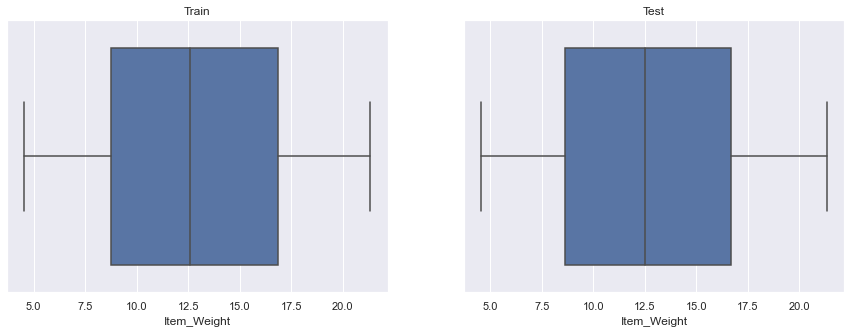

In [310]:
# ploting the weight to see the distribution of the data
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.boxplot(x="Item_Weight", data=train, ax=axes[0])
axes[0].set_title("Train")

sns.boxplot(x="Item_Weight", data=test, ax=axes[1])
axes[1].set_title("Test");

There are no "outlires" in the box plots above, so i think it is save to impute the missing values with weight mean

In [311]:
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

##### 2) Outlet size 


In [312]:
print('"{}" column in training set has {:.2f}% of missing values.'.format('Outlet_Size',
                                                          train["Outlet_Size"].isnull().sum() / train.shape[0] * 100))

print('"{}" column in test set has {:.2f}% of missing values.'.format('Outlet_Size',
                                                          test["Outlet_Size"].isnull().sum() / test.shape[0] * 100))

"Outlet_Size" column in training set has 28.28% of missing values.
"Outlet_Size" column in test set has 28.27% of missing values.


In [313]:
train["Outlet_Size"].isnull().sum(), test["Outlet_Size"].isnull().sum()

(2410, 1606)

In [314]:
# Checking nature of the data in the column
train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [315]:
test["Outlet_Size"].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

#### Displaying the percentage of categorical values in "Outlet_size"

In [316]:
# For train set
print("Percentage of 'Outlet_Size' column values in training dataset\n")
print(train["Outlet_Size"].value_counts() / train.shape[0] * 100)
print("-"*60)
print("Percentage of 'Outlet_Size' column values in test dataset\n")
print(test["Outlet_Size"].value_counts() / test.shape[0] * 100)

Percentage of 'Outlet_Size' column values in training dataset

Medium    32.770151
Small     28.018303
High      10.935117
Name: Outlet_Size, dtype: float64
------------------------------------------------------------
Percentage of 'Outlet_Size' column values in test dataset

Medium    32.775920
Small     28.023235
High      10.931174
Name: Outlet_Size, dtype: float64


As we can see the most common outlet size in all the outlets is the **"Medium"** size outlet, doubling the size og small outlets.

##### Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column.

In [317]:
train["Outlet_Size"] = train["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0])
test["Outlet_Size"] = test["Outlet_Size"].fillna(test["Outlet_Size"].mode()[0])

##### Sanity check

In [318]:
check_missing_values(train)

--------------------------------------------------
The DataFrame has No Missing Values!
--------------------------------------------------


In [319]:
check_missing_values(test)

--------------------------------------------------
The DataFrame has No Missing Values!
--------------------------------------------------


--------- 

##### I hava noticed that the item_fat_content has two categorical values but the are encoded unproparly

In [320]:
# Checking categorical values in the column
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [321]:
# Fixing the column in train and test dataset
train["Item_Fat_Content"].replace({"LF":"Low Fat", "low fat": "Low Fat", "reg": "Regular"}, inplace=True)
test["Item_Fat_Content"].replace({"LF":"Low Fat", "low fat": "Low Fat", "reg": "Regular"}, inplace=True)

In [322]:
# Sanity check
print(train["Item_Fat_Content"].value_counts())
print("-"*50)
print(test["Item_Fat_Content"].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
--------------------------------------------------
Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


#### Also the column type needed to fixed

In [323]:
# Changing the column type to string 
train["Item_Fat_Content"] = train["Item_Fat_Content"].apply(str)
test["Item_Fat_Content"] = test["Item_Fat_Content"].astype(str)

In [324]:
# Sanity check
train["Item_Fat_Content"].dtypes, train["Item_Fat_Content"].dtypes

(dtype('O'), dtype('O'))

#### Displaying the percentage of categorical values in "Item_Fat_Content"

In [325]:
# For train set
print("Percentage of 'Item_Fat_Content' column values in training dataset\n")
print(train["Item_Fat_Content"].value_counts() / train.shape[0] * 100)
print("-"*60)
print("Percentage of 'Item_Fat_Content' column values in test dataset\n")
print(test["Item_Fat_Content"].value_counts() / test.shape[0] * 100)

Percentage of 'Item_Fat_Content' column values in training dataset

Low Fat    64.730729
Regular    35.269271
Name: Item_Fat_Content, dtype: float64
------------------------------------------------------------
Percentage of 'Item_Fat_Content' column values in test dataset

Low Fat    64.566098
Regular    35.433902
Name: Item_Fat_Content, dtype: float64


The **"Low_fat"** items are approximatly double the values or regular one.

---------

## Step 4  : EDA

### 1) Univariate Analysis

In [326]:
def plot_univariate(col,width,height):
    """
    INPUT:
        col: Column name to be ploted 
        width: Figure width
        height: Figure hight 
        
    RETURN: 
        A plot of counted categorical items in the column
    """
    plt.figure(figsize=(width,height))
    sns.countplot(x=col,data=train,palette='Blues_r',
                  order=train[col].value_counts().index)

    plt.title("Distribution of "+col+" in the supermarkets",fontsize=18)
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(col,fontsize=16)
    plt.ylabel("Count",fontsize=16)

#### 1.1) Item Fat Content

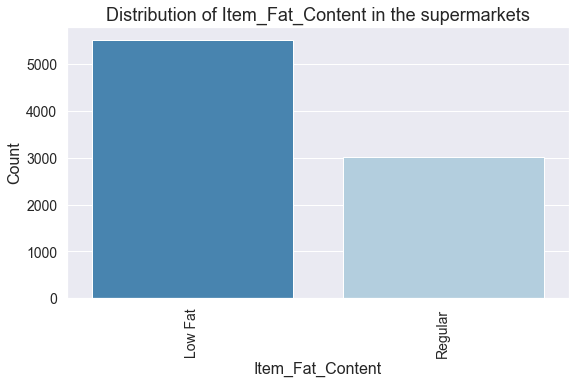

In [327]:
plot_univariate(col="Item_Fat_Content",width=9,height=5)

## Observations:

* The Items bought are more of Low Fat.

#### 1.2) Item type

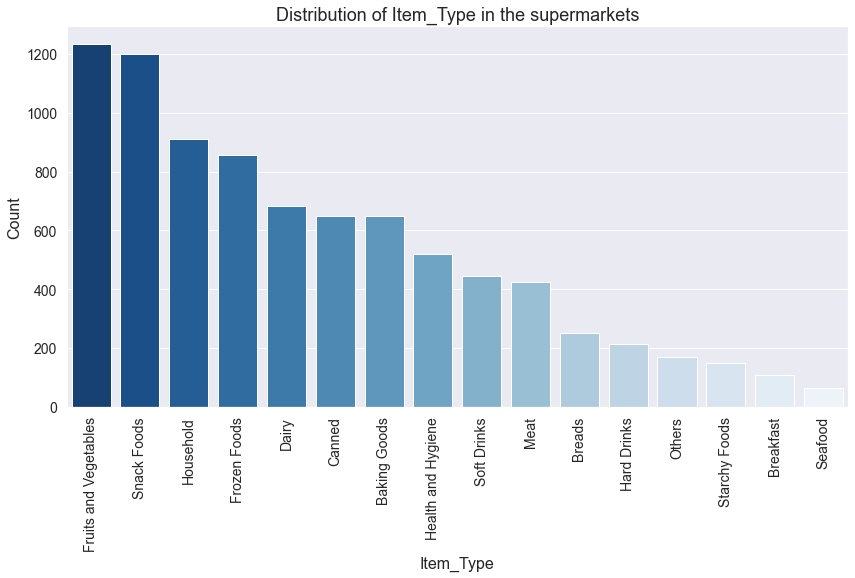

In [328]:
plot_univariate("Item_Type",14,7)

## Observations:

* "Fruits and vegetables" and "Snack food" are the most sold items in all the stores with all sizes.

#### 1.3) Outlet Size

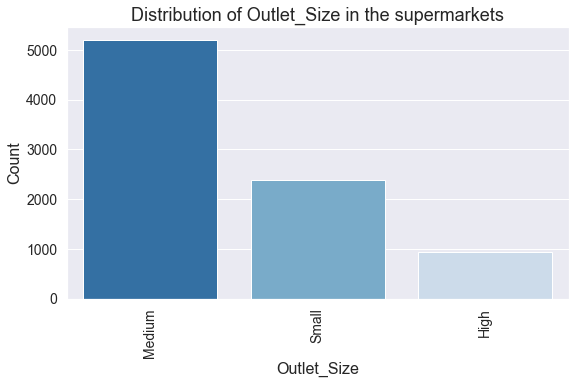

In [329]:
plot_univariate("Outlet_Size",9,5)

## Observations:

* "Medium" stores are more than the double of "Small" and "high".


### 2) Bivariate Analysis

#### 2.1) Item Fat Content regarding to the total sales


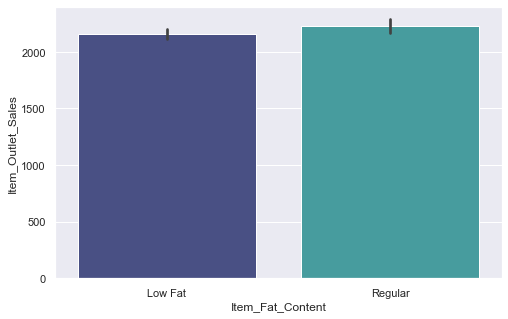

In [330]:
plt.figure(figsize=(8,5))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train,palette='mako');

### Observations:

* The range of prices per item whether it is Low_Fat or Regular are approximatly near to each others, but higher in regular itmes.

In [331]:
train.groupby("Item_Fat_Content")["Item_Outlet_Sales"].sum()

Item_Fat_Content
Low Fat    1.190409e+07
Regular    6.687031e+06
Name: Item_Outlet_Sales, dtype: float64

### Note:
The "Low_fat" items in the outlets are more than double the regular ones, so the avrage sales of low_fat are much higher With "5 mil" differance.

---------

#### 2.2) Item Visibility

The item visibility column has alot of values with zero in it this cannot be right, as the item is impossible to be unvisibile 
Lets chack that 

In [332]:
# Checking if the column has a zero value
print(train["Item_Visibility"].min())
print("#"*50)
# Double checking
print("\n",train["Item_Visibility"].value_counts())

0.0
##################################################

 0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64


*Lets impute this error with the mean*

In [333]:
# Imputing the column with the mean in both train and test datasets
train["Item_Visibility"] = train["Item_Visibility"].replace({0.000000: train["Item_Visibility"].mean()})
test["Item_Visibility"] = test["Item_Visibility"].replace({0.000000: test["Item_Visibility"].mean()})

In [334]:
# Sanity check
train["Item_Visibility"].min(), test["Item_Visibility"].min()

(0.003574698, 0.003591414)

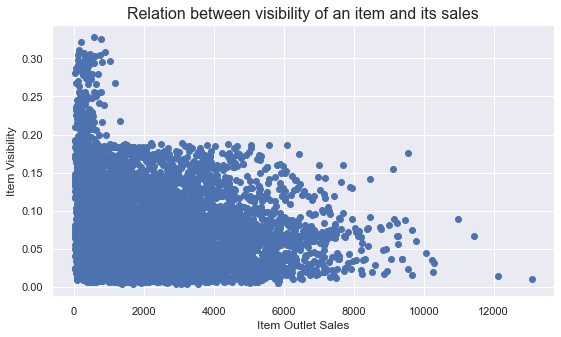

In [335]:
# Ploting the distribution of the column
plt.figure(figsize=(9,5))
plt.scatter(x='Item_Outlet_Sales',y='Item_Visibility',data=train)
plt.title("Relation between visibility of an item and its sales", fontsize=16)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Visibility');

We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers.



#### 2.3) Item_MRP
Item_MRP column has maximum Retail Price (list price) of the product

*At first lets visualize the column*

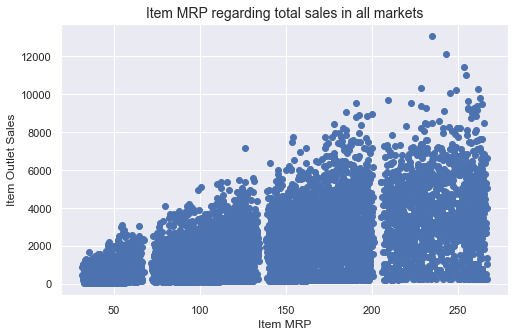

In [336]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=train)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title("Item MRP regarding total sales in all markets", fontsize=14);

As you can see the item MRP is kinda divided to four categories, the last two categories indicates that they tend to have higher sales.

Next step i will divide this column to four categories and the thir affect Item sales, and its better to be visiualized with barplot

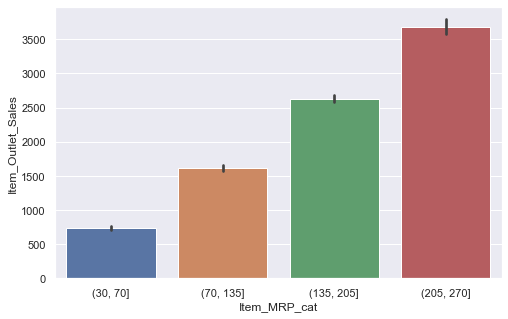

In [337]:
# Slicing the Item_MRP column into four categories 
train["Item_MRP_cat"] = pd.cut(train["Item_MRP"], [30,70,135,205,270])

# making sure i slice the data correct into those four categories
plt.figure(figsize=(8,5))
sns.barplot(y='Item_Outlet_Sales',x="Item_MRP_cat" ,data=train);

As you can see the data is alraedy cut into four categories 

Now i will preform numerical analysis on those categories

In [338]:
# seeing the numerical charactaristics for these categories
train.groupby("Item_MRP_cat")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_MRP_cat,,,,,,,,
"(30, 70]",1341.0,736.474596,492.895628,33.2900,379.5060,679.1160,986.7156,3112.6150
"(70, 135]",2751.0,1615.644414,1002.562854,73.2380,885.5140,1523.3504,2181.1608,7158.6816
"(135, 205]",3003.0,2632.137093,1611.594220,139.8180,1470.0864,2546.6850,3595.3200,9554.2300
"(205, 270]",1428.0,3679.669120,2123.502829,207.0638,2096.2713,3589.9936,5103.3570,13086.9648


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


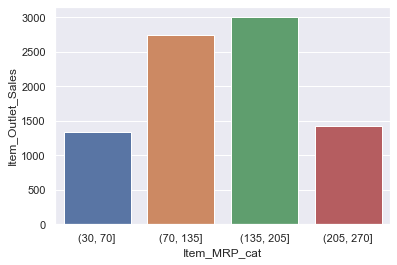

In [339]:
p =train.groupby("Item_MRP_cat")["Item_Outlet_Sales"].count().sort_values(ascending=False)
sns.barplot(p.index,p);

From the table above we can conclude that 
  - You can see that the number of sales made by the second categore which its Maximum Retail Price(MRP) between **((70, 135])** and **((135,205])** are nearly double the number of sales made by any other category, This means we should increase the most purchased product with this range  of Maximum Retail Price(MRP) in all supermarkets.
  
  - Also the mean of the products with MRP more than 200 is high , this is because it has higher price but not because it is purchased a lot.

----------

#### 2.4) Outlet_Establishment_Year
The year in which store was established.


In [340]:
# Numerical charactaristics of years related to sales
train.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Establishment_Year,,,,,,,,
1985,1463.0,2483.677474,2347.516621,33.9558,399.48000,1845.5976,3968.16800,13086.9648
1987,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.6640,3166.37835,10256.6490
1997,930.0,2277.844267,1488.405631,101.8674,1137.18640,1945.8005,3095.63710,9779.9362
1998,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
1999,930.0,2348.354635,1513.289464,111.8544,1182.79370,1966.1074,3281.72820,7646.0472
2002,929.0,2192.384798,1462.399658,99.8700,1068.60900,1834.9448,2929.52000,8994.9580
2004,930.0,2438.841866,1538.512533,113.8518,1238.88735,2109.2544,3310.35760,8479.6288
2007,926.0,2340.675263,1550.778025,143.8128,1195.94325,2005.0567,3096.46935,9664.7528
2009,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228


The count of sales made in all years are nearly thr same except for "1985" and "1998", the first is higher that the usual and the latter is way smaller. so its raises two questions here :-
- 1) What happend in "1985"?
    - Is it the first year and the starting busuness tend to have higher sales in the first year? 
    Or
    - there is something else related to the properties of the outlets?
- 2) What happend in "1998", why the sales droped down so far on this year?

###### Let me do further analysis to understand the data better before answering these questions.
From the data describtion "Outlet_Establishment_year" is the year in which store was established, not the years we collected the sales data, so we cant perform time series analysis, and the years column better be a categorical column.

so this analysis is to back up this theory and understand better. 

In [341]:
# Grouping Outlet_identifier with the years it was established in.
train.Outlet_Establishment_Year.groupby(train.Outlet_Identifier).apply(np.array).apply(lambda x: np.unique(x))

Outlet_Identifier
OUT010    [1998]
OUT013    [1987]
OUT017    [2007]
OUT018    [2009]
OUT019    [1985]
OUT027    [1985]
OUT035    [2004]
OUT045    [2002]
OUT046    [1997]
OUT049    [1999]
Name: Outlet_Establishment_Year, dtype: object

##### Observations:
The "Outlet_Establishment_Year" Is a categorical column indicating in which year the outlet is established.

ALso as we can see regarding the fist question we raised earlier which is:
- 1) What happend in "1985"?
    - Is it the first year and the starting busuness tend to have higher sales in the first year? 
    Or
    - there is something else related to the properties of the outlets?
    
#### Answer :
The year "1985" was a year that Bigmart established **TWO** Outlets ("OUT019" and "OUT027"), so when we grouped the sales with years, the first year was the sales of two outlets ("OUT019" and "OUT027") together.

So its better to group the sales by the Outlet_Identifier

In [342]:
train.groupby("Outlet_Identifier")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Identifier,,,,,,,,
OUT010,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
OUT013,932.0,2298.995256,1533.531664,73.2380,1072.60380,2050.6640,3166.37835,10256.6490
OUT017,926.0,2340.675263,1550.778025,143.8128,1195.94325,2005.0567,3096.46935,9664.7528
OUT018,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
OUT019,528.0,340.329723,249.979449,33.9558,153.63335,265.3213,460.73360,1482.0708
OUT027,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648
OUT035,930.0,2438.841866,1538.512533,113.8518,1238.88735,2109.2544,3310.35760,8479.6288
OUT045,929.0,2192.384798,1462.399658,99.8700,1068.60900,1834.9448,2929.52000,8994.9580
OUT046,930.0,2277.844267,1488.405631,101.8674,1137.18640,1945.8005,3095.63710,9779.9362


It appears now that every outlet has approximately the same number and mean of sales except for "OUT010" and "OUT019" **Why?**

In [343]:
# Grouping cat columns grouped by to understand better
train[["Outlet_Type",'Outlet_Size']].groupby(
                                             train.Outlet_Identifier).apply(np.array).apply(
                                             lambda x: np.unique(x))

Outlet_Identifier
OUT010        [Grocery Store, Medium]
OUT013      [High, Supermarket Type1]
OUT017    [Medium, Supermarket Type1]
OUT018    [Medium, Supermarket Type2]
OUT019         [Grocery Store, Small]
OUT027    [Medium, Supermarket Type3]
OUT035     [Small, Supermarket Type1]
OUT045    [Medium, Supermarket Type1]
OUT046     [Small, Supermarket Type1]
OUT049    [Medium, Supermarket Type1]
dtype: object

The "OUT010" and "OUT019" established in 1998 and 1985 are the only two stores that are a "Grocery Store" with smal size.
So it justifies the small number of sales they made, also the average sales they made are less than the other outlets as the maximum price pf an item in these outlets is 1500 while it is 10000 in the other outlets.

**So to sum up:**

These two outlets have **lower num of sales** made, and **lower price of item** relative to the other outlets, so it justifies lower number of overall Outlet sales.**


#### 2.5) Item type affecting the sales


In [344]:
# Order item types and their total sales
order_type = train.groupby("Item_Type")["Item_Outlet_Sales"].sum().sort_values(ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


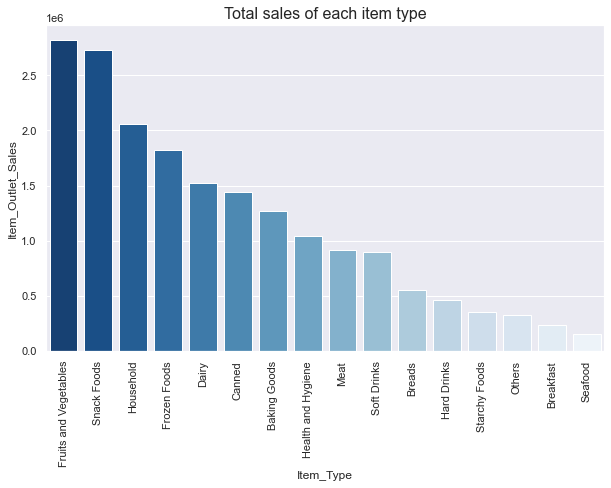

In [345]:
plt.figure(figsize=(10,6))
sns.barplot(order_type.index,order_type,palette='Blues_r')
plt.xticks(rotation=90)
plt.title("Total sales of each item type", fontsize=16);

### Observations:

* "Fruits and Vegetables" & "Snack Foods" are the most sold types in all the outlets with differance about 0.5 million over the next item.

## Step 5  : Feature Engineering

We will build a preprocessing pipeline, inside i am goging to scale the numerical data and encode the categorical ones then adding the classifier 

In [346]:
# Importing the important libiries

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

In [347]:
# Buliding the first part of the pipeline
# Scaling the numeric features 
num_features = ["Item_Weight","Item_Visibility","Item_MRP"]
numeric_transformer= Pipeline(
    steps=[("scaler", StandardScaler())]
)

# Encoding the important categorical features
categorical_features = train.select_dtypes(include=['object']).columns.tolist()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

## 1) Linear regression
Appending Linear regression classifier to preprocessing pipeline. Now we have a full prediction pipeline.

In [348]:
# Linearclassfier pipeline model
LR_clf = Pipeline(
    steps= [("preprocessor", preprocessor),
    ("classifier", LinearRegression())]
)

In [349]:
# Splitting the train data to dataset and a target value 
y= train['Item_Outlet_Sales']
X= train.drop("Item_Outlet_Sales", axis=1)

In [350]:
# Splitting the data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting the model
LR_clf.fit(X_train, y_train)
print("model score: %.3f" % LR_clf.score(X_test, y_test))

model score: 0.409


### Hyperparamters tuning for the model

Since the linear regression has no parametrs, there is no way to control the complexity of the model. We’ll explore some variations that add regularization below.

## 2) Ridge Regression (L2 Regularization)
Ridge regression uses L2 regularization to minimize the magnitude of the coefficients. It reduces the size of the coefficients and helps reduce model complexity.


In [351]:
# Importing ridge regression
from sklearn.linear_model import Ridge

# Buliding the pipeline for ridge regression
Ridge_clf = Pipeline(
    steps= [("preprocessor", preprocessor),
    ("classifier_Ridge", Ridge())]
)

# Fitting the model
Ridge_clf.fit(X_train, y_train)
print("model score: %.3f" % Ridge_clf.score(X_test, y_test))


model score: 0.477


We control the complexity of our model with the regularization parameter, ⍺

Higher values of alpha force coefficients to move towards zero and increase the restriction on the model. this decreases training performance, but also increase the generability of the model. setting the alphatoo high could lead to a model that is too simple and underfits the data .

With lower values of ⍺ the coefficients are less restricted. When ⍺ is very small the model becomes more similar to linear regression above and we risk overfitting.

Let’s see if we can improve performance using Scikit-Learn’s Ridge class:




In [170]:
# Find optimal alpha with grid search 
param_grid = {
    "classifier_Ridge__alpha":[0.001,0.01,0.1,1,10,100,150,1000]
}

# Insintiating grid search model
Ridge_grid = GridSearchCV(estimator=Ridge_clf, param_grid=param_grid,
                          scoring="r2",cv=5)

# Getting the best results in the grid search
Ridge_grid_result= Ridge_grid.fit(X_train, y_train)

print('Best Score: ', Ridge_grid_result.best_score_)
print('Best Params: ', Ridge_grid_result.best_params_)

Best Score:  0.5589879595010336
Best Params:  {'classifier_Ridge__alpha': 100}


*Our R² score increased by optimizing for alpha and went from (0.447) to (0.559)!*

### Evaluating the model on unseen data

#### R-Squared: 
R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* If the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

In [171]:
# Importing the r2 metric
from sklearn.metrics import r2_score

# Predicting on test data
y_pred = Ridge_grid.predict(X_test)

R2 = r2_score(y_test,y_pred)
R2

0.5605909393197235

## 2) XGBoost regressor
Appending XGBoost regressor to preprocessing pipeline. so we can have a full prediction pipeline for it.

In [172]:
# Importing XGBoost regressor 
from xgboost.sklearn import XGBRegressor

In [173]:
# XGBoost regressor pipeline model
XGB_reg = Pipeline(
    steps= [("preprocessor", preprocessor),
    ("XGB_regressor", XGBRegressor())]
)

# Fitting the moedel to the data
XGB_reg.fit(X_train, y_train)
print("XGB model accuracy: %.3f" % XGB_reg.score(X_test, y_test))

XGB model accuracy: 0.558


In [174]:
# Finding best paramets for XGB model 
param_grid = {
    "XGB_regressor__nthread": [4], # When use hyberthread, XGBoost may be slower
    "XGB_regressor__objective": ['reg:linear'],
    "XGB_regressor__learning_rate": [0.03,0.05,0.07],
    "XGB_regressor__max_depth": [5,6,7,15],
    "XGB_regressor__min_child_weight": [4,5,10],
    "XGB_regressor__silent": [1],
    "XGB_regressor__subsample": [0.07],
    "XGB_regressor__colsample_bytree": [0.07],
    "XGB_regressor__n_estimators":[100, 500,1000]
}
# Insintiating grid search model
XGB_grid = GridSearchCV(estimator=XGB_reg, param_grid=param_grid,
                          scoring="r2",cv=5,n_jobs=5,verbose=True)

# Getting the best results in the grid search
XGB_grid_result= XGB_grid.fit(X_train, y_train)

print('Best Score: ', XGB_grid_result.best_score_)
print('Best Params: ', XGB_grid_result.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[16:57:14] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:57:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Best Score:  0.5632082046566386
Best Params:  {'XGB_regressor__colsample_bytree': 0.07, 'XGB_regressor__learning_rate': 0.05, 'XGB_regressor__max_depth': 5, 'XGB_regressor__min_child_weight': 10, 'XGB_regressor__n_estimators': 1000, 'XGB_regressor__nthread': 4, 'XGB_regressor__objective': 'reg:linear', 'XGB_regressor__silent': 1, 'XGB_regressor__subsample': 0.07}


In [175]:
y_pred = XGB_grid_result.predict(X_test)

R2 = r2_score(y_test,y_pred)
R2

0.5586384992139655

Ridge is slighlity better on test data

# Conclusion
* The Items bought are more of Low Fat
* "Fruits and vegetables" and "Snack food" are the most sold items in all the stores with all sizes.
* The Item Outles sales are high for both Low Fat and Regular Item types, so its not justified why all the outlets have more low fat products than regular.
* The items with visibility near to zero is rarely purchased by the customers.
* You can see that the number of sales made by the second categore which its Maximum Retail Price(MRP) between **((70, 135]) and ((135,205])** are nearly double the number of sales made by any other category, This means we should increase the most purchased product with this range of Maximum Retail Price(MRP) in all supermarkets.

* Also the mean of the products with MRP more than 200 is high , this is because it has higher price but not because it is purchased a lot.
* The "Outlet_Establishment_Year" has no effect on the sales made by any outlet, as the number of sales made or the mean of all years are nearly the same .